In [3]:
import pandas as pd;
data=pd.read_csv("diabetes_prediction_dataset.csv");
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

le1=LabelEncoder()   
data['gender']=le1.fit_transform(data['gender'])
le2=LabelEncoder()
data['smoking_history']=le2.fit_transform(data['smoking_history'])
data['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

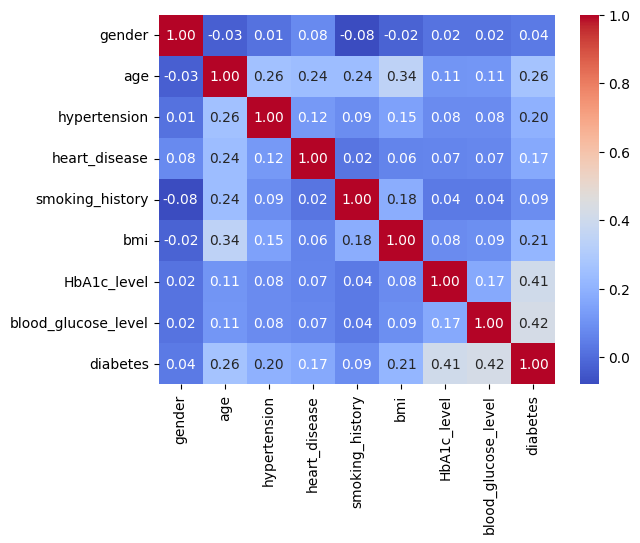

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data.corr()
heatmap=sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler


numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = MinMaxScaler()
normalized_numerical = scaler.fit_transform(data[numerical_columns])


normalized_numerical_df = pd.DataFrame(normalized_numerical, columns=numerical_columns)


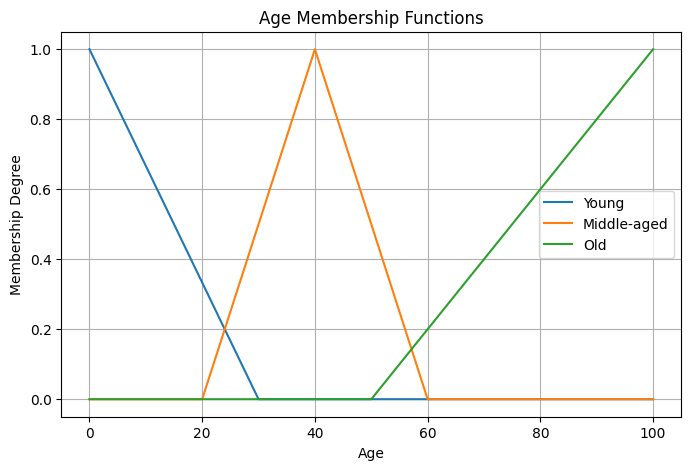

In [14]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

age = np.arange(0, 101, 1)

age_young = fuzz.trimf(age, [0, 0, 30])
age_middle = fuzz.trimf(age, [20, 40, 60])
age_old = fuzz.trimf(age, [50, 100, 100])

plt.figure(figsize=(8, 5))
plt.plot(age, age_young, label='Young')
plt.plot(age, age_middle, label='Middle-aged')
plt.plot(age, age_old, label='Old')
plt.title('Age Membership Functions')
plt.xlabel('Age')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()
plt.show()



In [17]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


bmi = np.arange(0, 51, 1)             
hba1c = np.arange(3, 11, 0.1)         
glucose = np.arange(50, 201, 1)       


bmi_underweight = fuzz.trimf(bmi, [0, 0, 18.5])
bmi_normal = fuzz.trimf(bmi, [18.5, 22.5, 24.9])
bmi_overweight = fuzz.trimf(bmi, [24, 27.5, 29.9])
bmi_obese = fuzz.trimf(bmi, [29.5, 35, 50])

hba1c_low = fuzz.trimf(hba1c, [3, 4.5, 5.7])
hba1c_normal = fuzz.trimf(hba1c, [5.5, 6.0, 6.5])
hba1c_high = fuzz.trimf(hba1c, [6.4, 8, 11])

glucose_low = fuzz.trimf(glucose, [50, 60, 70])
glucose_normal = fuzz.trimf(glucose, [65, 100, 140])
glucose_high = fuzz.trimf(glucose, [130, 160, 200])


plt.figure(figsize=(18, 10))


plt.subplot(3, 1, 1)
plt.plot(bmi, bmi_underweight, 'b', label='Underweight')
plt.plot(bmi, bmi_normal, 'g', label='Normal')
plt.plot(bmi, bmi_overweight, 'r', label='Overweight')
plt.plot(bmi, bmi_obese, 'm', label='Obese')
plt.title('BMI Membership Functions')
plt.xlabel('BMI')
plt.ylabel('Membership Degree')
plt.legend()


plt.subplot(3, 1, 2)
plt.plot(hba1c, hba1c_low, 'b', label='Low')
plt.plot(hba1c, hba1c_normal, 'g', label='Normal')
plt.plot(hba1c, hba1c_high, 'r', label='High')
plt.title('HbA1c Level Membership Functions')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Membership Degree')
plt.legend()


plt.subplot(3, 1, 3)
plt.plot(glucose, glucose_low, 'b', label='Low')
plt.plot(glucose, glucose_normal, 'g', label='Normal')
plt.plot(glucose, glucose_high, 'r', label='High')
plt.title('Blood Glucose Level Membership Functions')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('Membership Degree')
plt.legend()

plt.tight_layout()
plt.show()


AttributeError: module 'skfuzzy' has no attribute 'automf'

Predicted diabetes stage: 64.75438596491234


c:\Users\91620\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


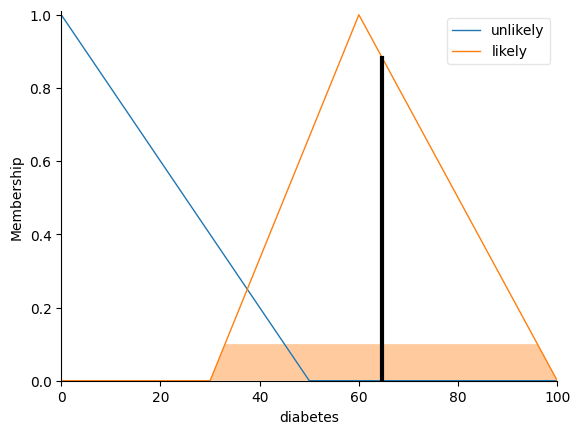

In [16]:
import skfuzzy.control as ctrl

# Define fuzzy variables
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
bmi = ctrl.Antecedent(np.arange(0, 51, 1), 'bmi')
hba1c = ctrl.Antecedent(np.arange(3, 11, 0.1), 'hba1c')
glucose = ctrl.Antecedent(np.arange(50, 201, 1), 'glucose')

# Define the output variable
diabetes = ctrl.Consequent(np.arange(0, 101, 1), 'diabetes')

# Automatically generate membership functions for age, bmi, hba1c, and glucose
age.automf(3)  # Low, Medium, High
bmi['underweight'] = fuzz.trimf(bmi.universe, [0, 0, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18.5, 22.5, 24.9])
bmi['overweight'] = fuzz.trimf(bmi.universe, [24, 27.5, 29.9])
bmi['obese'] = fuzz.trimf(bmi.universe, [29.5, 35, 50])

hba1c['low'] = fuzz.trimf(hba1c.universe, [3, 4.5, 5.7])
hba1c['normal'] = fuzz.trimf(hba1c.universe, [5.5, 6.0, 6.5])
hba1c['high'] = fuzz.trimf(hba1c.universe, [6.4, 8, 11])

glucose['low'] = fuzz.trimf(glucose.universe, [50, 60, 70])
glucose['normal'] = fuzz.trimf(glucose.universe, [65, 100, 140])
glucose['high'] = fuzz.trimf(glucose.universe, [130, 160, 200])

# Define output membership functions for diabetes stages
diabetes['unlikely'] = fuzz.trimf(diabetes.universe, [0, 0, 50])
diabetes['likely'] = fuzz.trimf(diabetes.universe, [30, 60, 100])

# Define rules
rule1 = ctrl.Rule(bmi['obese'] & hba1c['high'], diabetes['likely'])
rule2 = ctrl.Rule(hba1c['normal'] & glucose['normal'], diabetes['unlikely'])
rule3 = ctrl.Rule(age['poor'] & hba1c['high'], diabetes['likely'])

# Control System
diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
diabetes_simulation = ctrl.ControlSystemSimulation(diabetes_ctrl)

# Example input
diabetes_simulation.input['age'] = 45
diabetes_simulation.input['bmi'] = 28
diabetes_simulation.input['hba1c'] = 7
diabetes_simulation.input['glucose'] = 150

# Compute the output
diabetes_simulation.compute()

# Show the result
print(f"Predicted diabetes stage: {diabetes_simulation.output['diabetes']}")

# Visualize the result
diabetes.view(sim=diabetes_simulation)
